# Term-Project 최종 보고서

### 웹/파이썬 프로그래밍(SWCON104)

### 소프트웨어융합대학 컴퓨터공학과
### 2023105721 한현비

## 1. 주제 및 주제 선정 이유

### 배달어플 사용 추이 및 요식업에서 배달이 차지하는 수준과 영향력

대학 생활을 하다보면, 많은 학생들이 거의 매일 배달음식으로 끼니를 때우고 있다는 사실을 목격할 수 있습니다. 또한 배달에 대한 토픽들은 '배달료 상승' 등과 같은 식으로 우리에게 매우 익숙하기도 합니다. 나는 이렇게 우리 주변에 익숙하게 자리잡은 '배달'이라는 문화는 언제부터 본격적으로 시장에 들어오게 되었는지, 주요 고객층은 누구인지, 배달 어플이 사회(코로나, 1인가구 등)와 어떤 연관이 있는지 궁금하여 이 주제를 선정하게 되었습니다.

## 2. 가설 정의

### 1) 코로나 사태 이후 배달 사용량이 급증했을 것이다.

 코로나 사태 이후 외출하여 사람을 만나는 일이 줄어들고, 자택근무 등 집에서 보내는 시간이 현저히 늘어났습니다. 따라서 외식에 대한 수요가 일부 배달어플로 유입되었을 것이라 생각됩니다.또한 코로나 사태가 완화된 후에도 이미 배달 어플의 편리함을 맛보고 배달료에 무뎌진 사람들은 쉽사리 그 편리함을 잃지 않으려 할 것이라고 생각했기 때문입니다.

### 2) 평일보다는 주말에 사용량이 더 많을 것이다.

학교를 다니거나 직장을 다니는 등, 사회생활을 하다보면 다른 사람들과 음식점에서 밥을 사먹거나, 귀가시에 포장하여 집에 들고가는 경우가 많습니다. 반면 집에있는 경우 오히려 배달을 시키는 경우가 더 많다고 생각합니다. 따라서 대부분의 사람들이 밖에서 활동하는평일보다 집에서 쉬는 주말에 배달 이용량이 더 많을 것이라 생각됩니다.

### 3) 배달 사용량은 날씨에 영향을 받을 것이다.

비가 오는 날에는 포장을 하러가는 사람과 장을 보러가는 사람 모두 줄어들 것이라 생각됩니다. 교통도 악화되고 한 손이 움직임이 제한된 상태로 나머지 한 손에도 짐을 들고 오는 것이 힘들기 때문입니다. 따라서 비가 오는 날에는 배달음식을 시켜먹는 사람이 늘어날 것이라고 생각했습니다.

## 3. 데이터 획득 및 가공

### 1) 온라인상에서 음식서비스의 거래액 데이터 수집
시간에 따른 거래 규모의 변화를 알아보기 위해서입니다.

해당 데이터들은 csv형태로 다운되며, 다음은 데이터를 불러오는 코드입니다.

In [64]:
import pandas as pd

pd1y = pd.read_csv("(년도별)온라인쇼핑몰_판매매체별_상품군별거래액_20230607210345.csv", encoding='cp949')


pd1q = pd.read_csv("(분기별)온라인쇼핑몰_판매매체별_상품군별거래액_20230611190503.csv", encoding='cp949')

In [65]:
pd1y

,상품군별(1),판매매체별(1),2017,2018,2019,2020,2021,2022
0,음식서비스,계,2732568,5262777,9735362,17337092,26159657,26593973
1,음식서비스,인터넷쇼핑,378319,489773,666029,900453,682496,529173
2,음식서비스,모바일쇼핑,2354254,4773004,9069334,16436639,25477161,26064800


In [66]:
pd1q

,상품군별(1),판매매체별(1),2019.3/4,2019.4/4,2020.1/4,2020.2/4,2020.3/4,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4,2022.2/4,2022.3/4,2022.4/4,2023.1/4 p)
0,음식서비스,계,2600812,2999989,3451096,3837303,4660427,5388266,5906523,6218025,7105007,6930102,7134340,6369509,6576104,6514020,6370235
1,음식서비스,인터넷쇼핑,170225,187886,208074,234341,232218,225820,187489,162909,176914,155184,152199,131526,126087,119361,114448
2,음식서비스,모바일쇼핑,2430588,2812104,3243022,3602962,4428209,5162446,5719034,6055116,6928093,6774918,6982141,6237983,6450017,6394659,6255787


자료를 후에 사용하기 편하게 만들어주었습니다.
행렬에서 행과 열을 바꾸고 필요없는 부분을 잘라낸 뒤 다시 항목별로 이름을 붙이는 코드입니다.

In [67]:
pd1y_transpose = pd1y.T.iloc[2:,:]
pd1y_transpose.columns = ["계", "인터넷쇼핑", "모바일쇼핑"]
pd1y_transpose

,계,인터넷쇼핑,모바일쇼핑
2017,2732568,378319,2354254
2018,5262777,489773,4773004
2019,9735362,666029,9069334
2020,17337092,900453,16436639
2021,26159657,682496,25477161
2022,26593973,529173,26064800


In [68]:
pd1q_transpose = pd1q.T.iloc[2:,:]
pd1q_transpose.columns = ["계", "인터넷쇼핑", "모바일쇼핑"]
pd1q_transpose

,계,인터넷쇼핑,모바일쇼핑
2019.3/4,2600812,170225,2430588
2019.4/4,2999989,187886,2812104
2020.1/4,3451096,208074,3243022
2020.2/4,3837303,234341,3602962
2020.3/4,4660427,232218,4428209
2020.4/4,5388266,225820,5162446
2021.1/4,5906523,187489,5719034
2021.2/4,6218025,162909,6055116
2021.3/4,7105007,176914,6928093
2021.4/4,6930102,155184,6774918


### 2) 7월 한 달 동안 날씨에 따른 배달 품목 데이터 수집
날씨별 배달량을 합산하여 비가 왔을 때와 비가 오지 않았을 때의 배달사용량을 비교하기 위해서입니다.

아래는 해당 데이터를 불러오는 코드입니다.

In [69]:
weather_df = pd.read_csv("(날씨)KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20200701000000.csv")
weather_df

,강원도,강릉시,2020-07-01,12,없음,83.0,0.0,19.0,3.5,약,...,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12
0,강원도,강릉시,2020-07-01,13,없음,82.0,0.0,18.8,4.0,약간강,...,0,0,0,0,0,0,0,0,0,0
1,강원도,강릉시,2020-07-01,18,없음,78.0,0.0,18.5,2.8,약,...,0,0,0,0,0,0,0,0,0,0
2,강원도,강릉시,2020-07-02,13,없음,74.0,0.0,21.9,1.2,약,...,0,0,0,0,0,0,0,0,0,0
3,강원도,강릉시,2020-07-03,11,없음,84.0,0.0,20.5,0.9,약,...,0,0,0,0,0,0,0,0,0,0
4,강원도,강릉시,2020-07-04,16,없음,84.0,0.0,19.8,0.5,약,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34625,충청북도,충주시,2020-07-31,19,없음,98.0,0.0,23.5,0.6,약,...,1,18,0,0,5,0,0,0,0,0
34626,충청북도,충주시,2020-07-31,20,없음,97.0,0.0,23.6,0.3,약,...,0,13,0,0,3,0,0,0,0,0
34627,충청북도,충주시,2020-07-31,21,없음,94.0,0.0,24.6,0.5,약,...,0,16,0,0,2,0,0,0,0,0
34628,충청북도,충주시,2020-07-31,22,없음,93.0,0.0,25.5,1.0,약,...,0,10,0,0,0,0,0,0,0,0


저는 강우 여부에 따라 날씨를 나눌 것이므로 usecols를 이용하여 필요한 데이터들만 남기는 코드를 짰습니다.
또한 첫 줄의 데이터를 사용하기 위해 header를 사용했습니다.

위의 데이터와 마찬가지로 후에 가공하기 편한 형태로 만들었습니다.

In [70]:
use = [2, 4, 13, 14, 15, 16, 17, 18,19,20,21,22,23,24,25, 26]
weather_df = pd.read_csv("(날씨)KGU_3rd_ORIGIN_KGUWTHRDLVRDF_20200701000000.csv",  header=None,usecols=use)
weather_df.columns = ['날짜', '강우여부',  13, 14, 15, 16, 17, 18,19,20,21,22,23,24,25, 26]
weather_df["배달량"] = weather_df.iloc[:,2:].sum(axis=1)
weather_df = weather_df.drop(columns=use[2:])
weather_df.head()

,날짜,강우여부,배달량
0,2020-07-01,없음,1
1,2020-07-01,없음,1
2,2020-07-01,없음,2
3,2020-07-02,없음,1
4,2020-07-03,없음,1


비가 왔을 때의 배달량과 비가 오지 않았을 때의 배달량을 각각 합산하는 코드입니다.

In [71]:
rainy_deliver_sum = weather_df[(weather_df["강우여부"]=="비")]["배달량"].sum()
sunny_deliver_sum = weather_df[(weather_df["강우여부"]=="없음")]["배달량"].sum()

In [72]:
sum_df = pd.DataFrame(columns=["강우여부", "배달량"])
sum_df.loc[len(sum_df)]=["비", rainy_deliver_sum]
sum_df.loc[len(sum_df)]=["없음", sunny_deliver_sum]
sum_df

,강우여부,배달량
0,비,137204
1,없음,961225


위의 결과값만 보면 비가 오지 않았을 때 배달량이 훨씬 많아 보이지만 정확한 측정을 위해 합산 개수로 나누어 평균을 구하는 코드를 추가로 작성했습니다.

In [73]:
rainy_deliver_mean = weather_df[(weather_df["강우여부"]=="비")]["배달량"].mean()
sunny_deliver_mean = weather_df[(weather_df["강우여부"]=="없음")]["배달량"].mean()

In [74]:
mean_df = pd.DataFrame(columns=["강우여부", "배달량"])
mean_df.loc[len(mean_df)]=["비", rainy_deliver_mean]
mean_df.loc[len(mean_df)]=["없음", sunny_deliver_mean]
mean_df

,강우여부,배달량
0,비,31.701479
1,없음,31.720457


### 3) 시간대/요일별에 따른 배달 품목 데이터 수집
요일별 배달량을 합산하여 평일과 주말의 배달량 차이를 비교하기 위해서입니다.

In [75]:
pd2 = pd.read_csv("(요일,시간대)KGU_3rd_ORIGIN_KGUAREADOITEM_20210701000000.csv")
pd2

,﻿2021-07-01,00,목요일,충청남도,천안시 동남구,돈까스/일식
0,2021-07-01,0,목요일,충청남도,천안시 동남구,족발/보쌈
1,2021-07-01,0,목요일,경기도,동두천시,돈까스/일식
2,2021-07-01,0,목요일,경기도,동두천시,돈까스/일식
3,2021-07-01,0,목요일,경상북도,영천시,돈까스/일식
4,2021-07-01,0,목요일,경상북도,영천시,돈까스/일식
...,...,...,...,...,...,...
4271690,2021-12-31,23,금요일,경상남도,진주시,분식
4271691,2021-12-31,23,금요일,부산광역시,강서구,치킨
4271692,2021-12-31,23,금요일,부산광역시,강서구,치킨
4271693,2021-12-31,23,금요일,부산광역시,강서구,치킨


위와 같은 방법으로 사용하기 편하고 필요한 데이터만을 남겨두기 위해 작성한 코드입니다.

In [76]:
pd2 = pd.read_csv('(요일,시간대)KGU_3rd_ORIGIN_KGUAREADOITEM_20210701000000.csv',header=None,usecols=[2,1])
pd2.columns=["시간대",'요일']
pd2.head()

,시간대,요일
0,0,목요일
1,0,목요일
2,0,목요일
3,0,목요일
4,0,목요일


목요일 00시에 접수된 배달을 합산하는 코드입니다.

In [77]:
nums = pd2[(pd2["시간대"]==0) & (pd2["요일"]=="목요일")].shape[0]
nums

5945

시간대와 요일을 중복을 제거한 리스트로 만들고 반복문을 사용하여 정리해주었습니다.

In [78]:
times = pd2["시간대"].unique().tolist()
days = pd2["요일"].unique().tolist()
days = days[-3:] + days[:4]
day_time_df = pd.DataFrame(columns=["요일","시간대","배달량"])
for day in days:
    for time in times:
        day_time_df.loc[len(day_time_df)] = [day, time, pd2[(pd2["시간대"]==time) & (pd2["요일"]==day)].shape[0]]
day_time_df.head()

,요일,시간대,배달량
0,월요일,0,6601
1,월요일,1,2995
2,월요일,2,1293
3,월요일,3,700
4,월요일,4,508


In [79]:
day_time_df # 요일 / 시간대 / 배달량

,요일,시간대,배달량
0,월요일,0,6601
1,월요일,1,2995
2,월요일,2,1293
3,월요일,3,700
4,월요일,4,508
...,...,...,...
163,일요일,19,75392
164,일요일,20,55185
165,일요일,21,40478
166,일요일,22,25726


아래는 요일별 배달량과 시간대별 배달량으로 나눈 코드입니다.

In [80]:
day_df = pd.DataFrame(columns=["요일","배달량"])
for day in days:
    day_df.loc[len(day_df)] = [day, pd2[(pd2["요일"]==day)].shape[0]]

In [81]:
day_df

,요일,배달량
0,월요일,524387
1,화요일,510065
2,수요일,531886
3,목요일,556533
4,금요일,676139
5,토요일,745587
6,일요일,727099


In [82]:
time_df = pd.DataFrame(columns=["시간대","배달량"])
for time in times:
    time_df.loc[len(time_df)] = [time, pd2[(pd2["시간대"]==time)].shape[0]]

In [83]:
time_df

,시간대,배달량
0,0,48780
1,1,23211
2,2,10667
3,3,5588
4,4,4003
5,5,2427
6,6,2428
7,7,3693
8,8,9252
9,9,28364


## 4. 분석결과

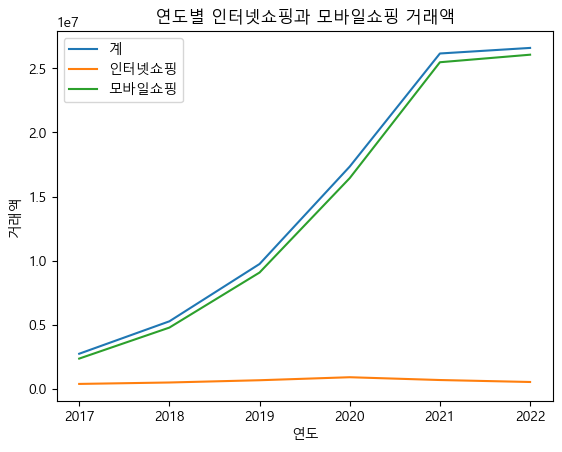

In [84]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

ax = pd1y_transpose.plot()
plt.xlabel('연도')
plt.ylabel('거래액')
plt.title('연도별 인터넷쇼핑과 모바일쇼핑 거래액')
ax.legend()
plt.show()

2017년 ~ 2018년보다는 2018년 ~ 2019년이, 2018년 ~ 2019년보다는 2019년 ~ 2021년에 급격하게 늘어났음을 확인할 수 있으며 2021년~2022년에는 미미한 차이로 증가했습니다.

더 자세히 알아보기 위해 분기별 그래프를 살펴보겠습니다.

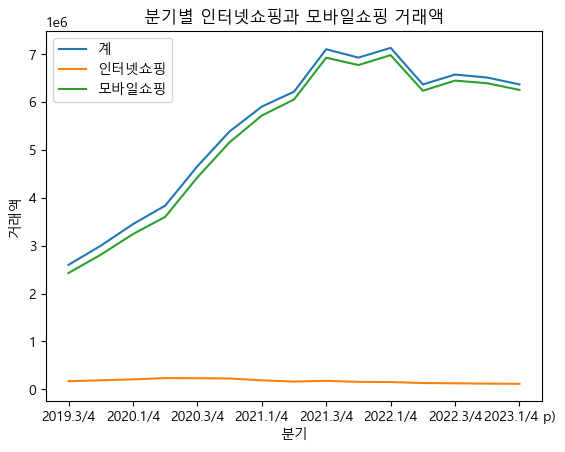

In [85]:

ax = pd1q_transpose.plot()
plt.xlabel('분기')
plt.ylabel('거래액')
plt.title('분기별 인터넷쇼핑과 모바일쇼핑 거래액')
ax.legend()
plt.show()

2020년 2분기에서 4분기,2021년 2분기에서 3분기에 급격하게 상승함을 알 수 있습니다.

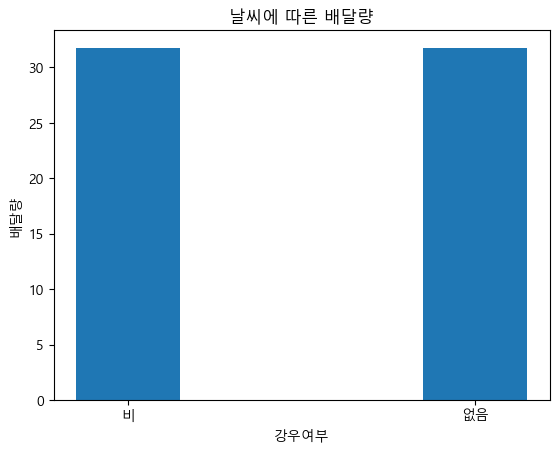

In [86]:
plt.bar(mean_df['강우여부'], mean_df['배달량'],width=0.3)
plt.xlabel('강우여부')
plt.ylabel('배달량')
plt.title('날씨에 따른 배달량')
plt.show()

강우여부에 따른 배달량의 평균은 큰 차이가 없습니다

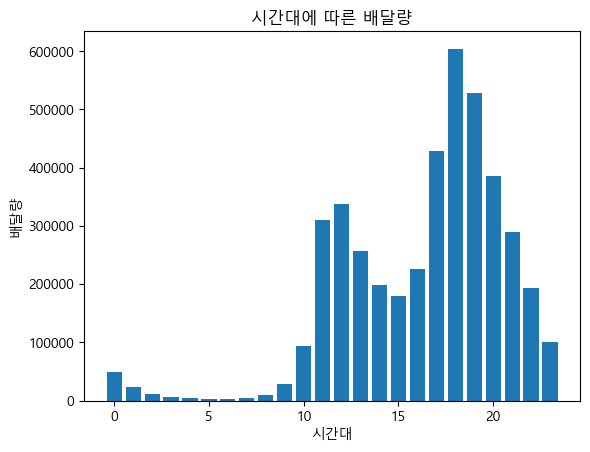

In [87]:
plt.bar(time_df['시간대'], time_df['배달량'])
plt.xlabel('시간대')
plt.ylabel('배달량')
plt.title('시간대에 따른 배달량')
plt.show()

저녁시간대인 17시 ~ 20시까지가 가장 배달량이 많고 그 다음으로는 점심시간대인 11시 ~ 13시인 것을 확인할 수 있습니다.

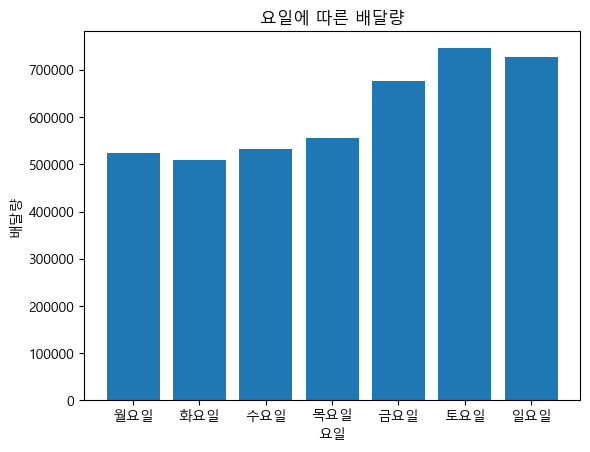

In [88]:
plt.bar(day_df['요일'], day_df['배달량'])
plt.xlabel('요일')
plt.ylabel('배달량')
plt.title('요일에 따른 배달량')
plt.show()


평일인 월화수목은 비슷한 수준이고 주말과는 확연히 차이가 나는 것을 볼 수 있습니다.

가장 배달량이 많은 요일은 토요일, 일요일, 금요일 순입니다.

## 5. 결론

### 1) 코로나 사태 이후 배달 사용량이 급증했을 것이다.

대한민국에서 코로나19는 2020년 2월 중순부터 발병하기 시작했으며 3월 쯤 잠시 급증한 후 안정적이다 2020년 12월부터 폭발적으로 급증했습니다.

코로나 확진이라는 사회적 사건이 일어나고 그 영향이 사람들의 심리에 영향을 끼치고 행동으로 옮겨지는 시간을 고려하면 배달량이 급격히 늘어난 것은 코로나와 연관이 있다는 가설은 타당한 것 같습니다.

또한 연도,분기에 상관없이 인터넷 쇼핑의 추이에는 별 다른 변화가 없는 것을 보아 전자기기의 보급, 확산등 다른 사회적배경은 큰 영향을 끼치지 않았음을 추측해볼 수 있습니다. 

### 2) 평일보다는 주말에 사용량이 더 많을 것이다.

그래프에서도 확인할 수 있듯이 평일과 주말의 차이는 유의미합니다.

다만 금요일은 평일임에도 불구하고 주말과 비슷하게 높은 배달량을 기록하고 있습니다.

다음 날이 주말이라는 특성상 금요일 오후(퇴근후,하교후)부터는 휴일이라고 생각하는 현대인들의 사고가 반영된 결과값인 것 같습니다.

### 3) 배달 사용량은 날씨에 영향을 받을 것이다.

비가 오면 배달을 시켜먹는 사람이 늘어날 것이라는 가설과 다르게 막대그래프를 살펴보면 평균값이 비슷합니다.

따라서 배달 사용량은 날씨에 영향을 받지 않습니다.

다만, 비가 오면 배달대행업체에서 자체적으로 주문을 거부하는 경우가 많다는 것을 생각하면 소비자들이 비오는 날에 배달을 선호하는 것이 완전히 틀린 것만은 아닌 것 같습니다.

## 6. 참고문헌 및 데이터 출처

-유튜브 

[[프로젝트발표영상] 배달 매출 예측 분석] (https://www.youtube.com/watch?v=ukeIsaagLBI)

-위키독스 (https://wikidocs.net/book/5011)

[16. Matplotlib 막대 그래프 그리기]
[34. Matplotlib 두 종류의 그래프 그리기]

-티스토리

[[판다스, pandas] 행 열 전환(transpose) - 컴공생의 다이어리] (https://computer-science-student.tistory.com/158)

[[파이썬/matplotlib] 선 그래프 그리기 + 테마 (스타일 시트) 설정] (https://benn.tistory.com/33)

[[데이터 불러오기] read_csv에서 컬럼 지정해서 ... - whdgus928] (https://whdgus928.tistory.com/4)

[파이썬(python) 합계 구하기, sum 함수 이용 - 티스토리] (https://qwertyuioop.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%ACpython-%ED%95%A9%EA%B3%84-%EA%B5%AC%ED%95%98%EA%B8%B0-sum-%ED%95%A8%EC%88%98-%EC%9D%B4%EC%9A%A9)

-챗지피티

## 7. 별첨

-통계청 [온라인쇼핑몰_판매매체별_상품군별거래액] (https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10071)

-KT_통신_빅데이터_플랫폼 [날씨별 배달 품목차이] (https://bdp.kt.co.kr/invoke/SOKBP2603/?goodsCode=KGUWTHRDLVRDF)

-KT_통신_빅데이터_플랫폼 [지역-요일 배달 품목정보] (https://bdp.kt.co.kr/invoke/SOKBP2603/?goodsCode=KGUAREADOITEM)